<h1>linear_regression

In [1]:
#linear_regression:for predicting profit estimation on 1000companies data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [7]:
pwd

'C:\\Users\\Harsha\\Desktop\\Machine Learning\\Supervised_Learning\\Test'

In [8]:
companies=pd.read_csv("C:\\Users\\Harsha\\Desktop\\Machine Learning\\Datasets\\1000_Companies.csv")

In [9]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [46]:
df_x=companies.iloc[:,:3].values

In [47]:
df_x[0]

array([165349.2, 136897.8, 471784.1])

In [48]:
df_y=companies.iloc[:,-1].values

In [49]:
df_y[0]

192261.83

<Axes: >

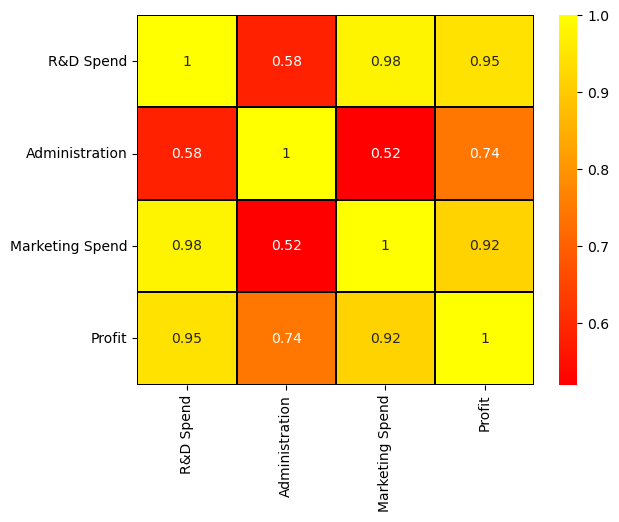

In [50]:
sns.heatmap(companies.drop(columns="State").corr(),cmap=plt.cm.autumn,linecolor="black",linewidths=.2,annot=True)

<Axes: >

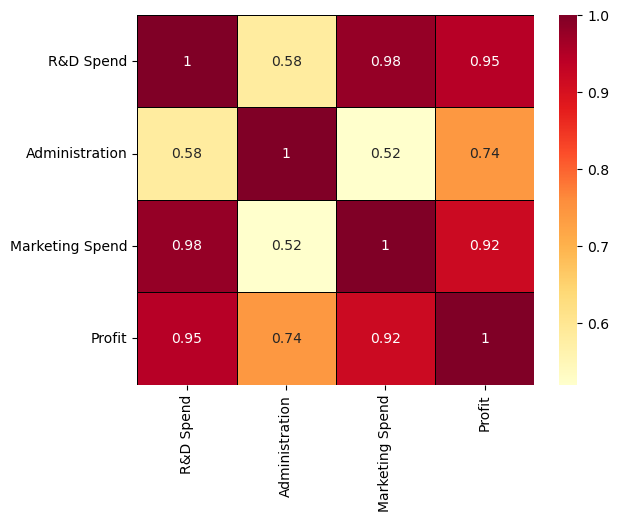

In [51]:
sns.heatmap(companies.drop(columns="State").corr(),cmap=plt.cm.YlOrRd,annot=True,linewidths=0.5,linecolor="black")

In [52]:
linear_reg=LinearRegression()

In [53]:
linear_reg.fit(df_x,df_y)

LinearRegression()

In [54]:
linear_reg.score(df_x,df_y)*100

94.98636456185335

In [55]:
x_test=np.array([[134970.00,130390.080,329204.0228]])

In [56]:
sol=[164336.60550]

In [57]:
mdl_pred=linear_reg.predict(x_test)

In [58]:
list(mdl_pred)

[164993.97087485198]

<h1>Logistic Regression

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.datasets import load_digits

In [61]:
digits=load_digits()

In [63]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

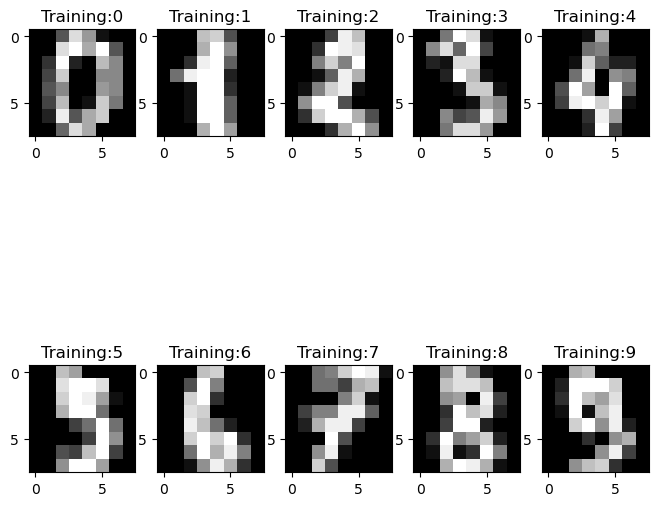

In [68]:
plt.figure(figsize=(8,8))
for i in range(10):
    image=digits.data[i]
    label=digits.target[i]
    plt.subplot(2,5,i+1)
    plt.imshow(image.reshape(8,8),cmap=plt.cm.gray)
    plt.title(f"Training:{label}")
plt.show()

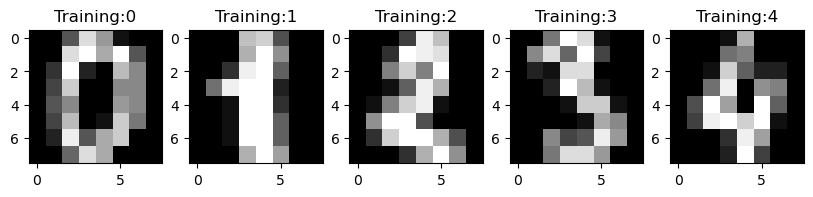

In [108]:
#displaying few data's:
plt.figure(figsize=(10,10))
for i in range(5):
    image=digits.data[i]
    label=digits.target[i]
    plt.subplot(1,5,i+1)
    plt.imshow(image.reshape(8,8),cmap=plt.cm.gray)
    plt.title(f"Training:{label}")
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.24,random_state=3)

In [88]:
x_train.shape

(1365, 64)

In [89]:
y_train.shape

(1365,)

In [92]:
logist=LogisticRegression(max_iter=200)

In [93]:
logist.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [101]:
score=logist.score(x_test,y_test)*100

In [97]:
y_pred=logist.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix

In [98]:
cm=confusion_matrix(y_test,y_pred)

In [99]:
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  3,  0,  0, 47,  0,  1,  1,  1,  0],
       [ 0,  1,  0,  0,  1, 36,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 36,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 29]], dtype=int64)

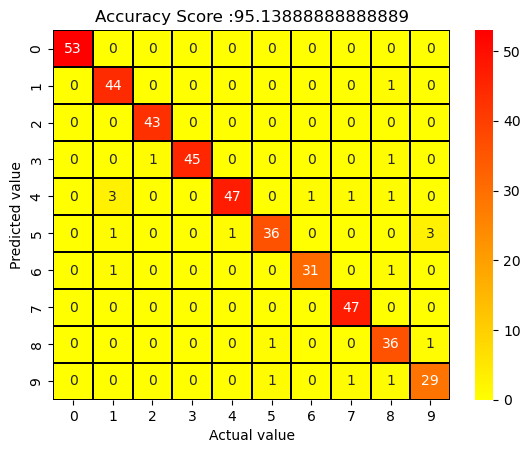

In [103]:
sns.heatmap(cm,annot=True,linewidths=0.3,linecolor="black",cmap=plt.cm.autumn_r)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title(f"Accuracy Score :{score}")
plt.show()

<h2>Text Classifier using Naive Bayes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

In [2]:
data=fetch_20newsgroups()

In [8]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories=data.target_names

In [10]:
train=fetch_20newsgroups(subset="train",categories=categories)

In [11]:
test=fetch_20newsgroups(subset="test",categories=categories)

In [15]:
len(train.data)

11314

In [16]:
len(train.target)

11314

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB(alpha=0.2))

In [18]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.2))])

In [19]:
y_pred=model.predict(test.data)

In [20]:
y_true=test.target

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
score=accuracy_score(y_true,y_pred)*100

In [28]:
cm=confusion_matrix(y_true,y_pred)

Text(0.5, 1.0, 'Accuracy:81.89060010621348')

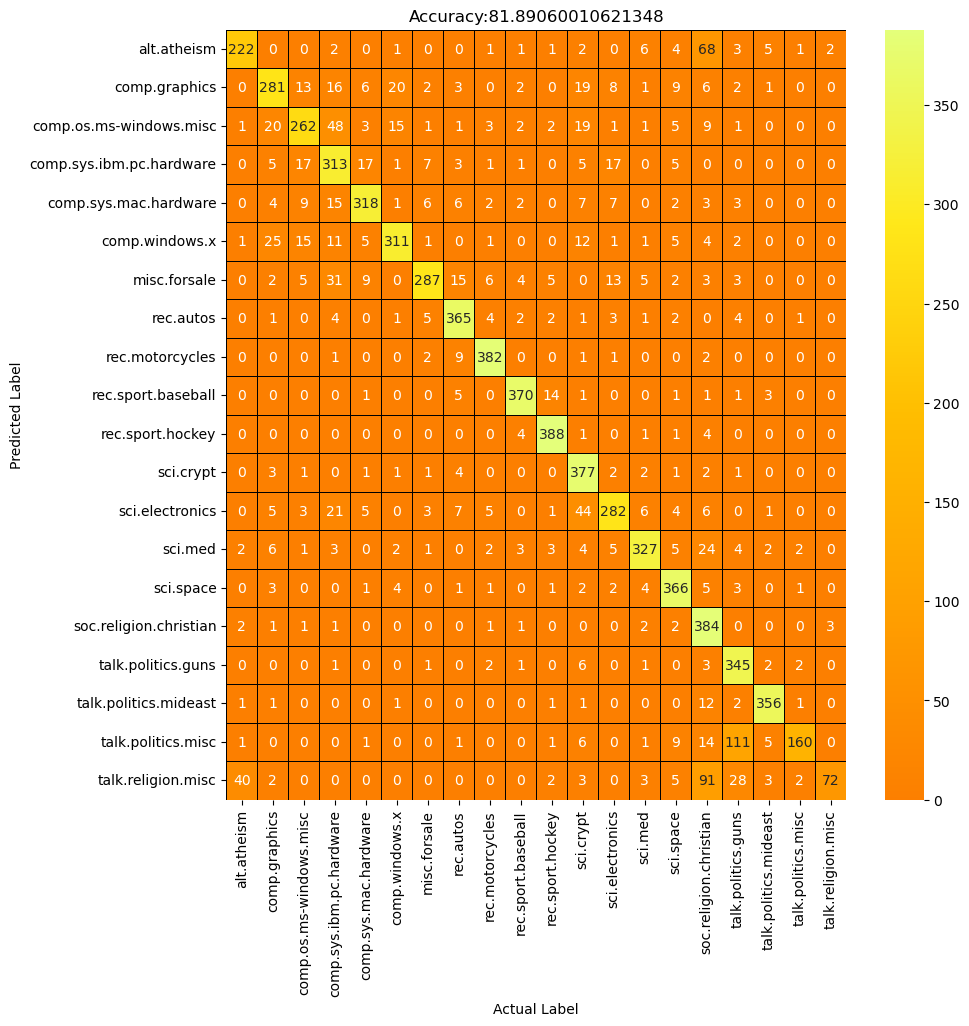

In [31]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="black",cmap=plt.cm.Wistia_r,fmt="d",xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title(f"Accuracy:{score}")

In [50]:
pred=model.predict(["The president of America is going to announce War"])

In [51]:
pred

array([18], dtype=int64)

In [54]:
train.target_names[pred[0]]

'talk.politics.misc'